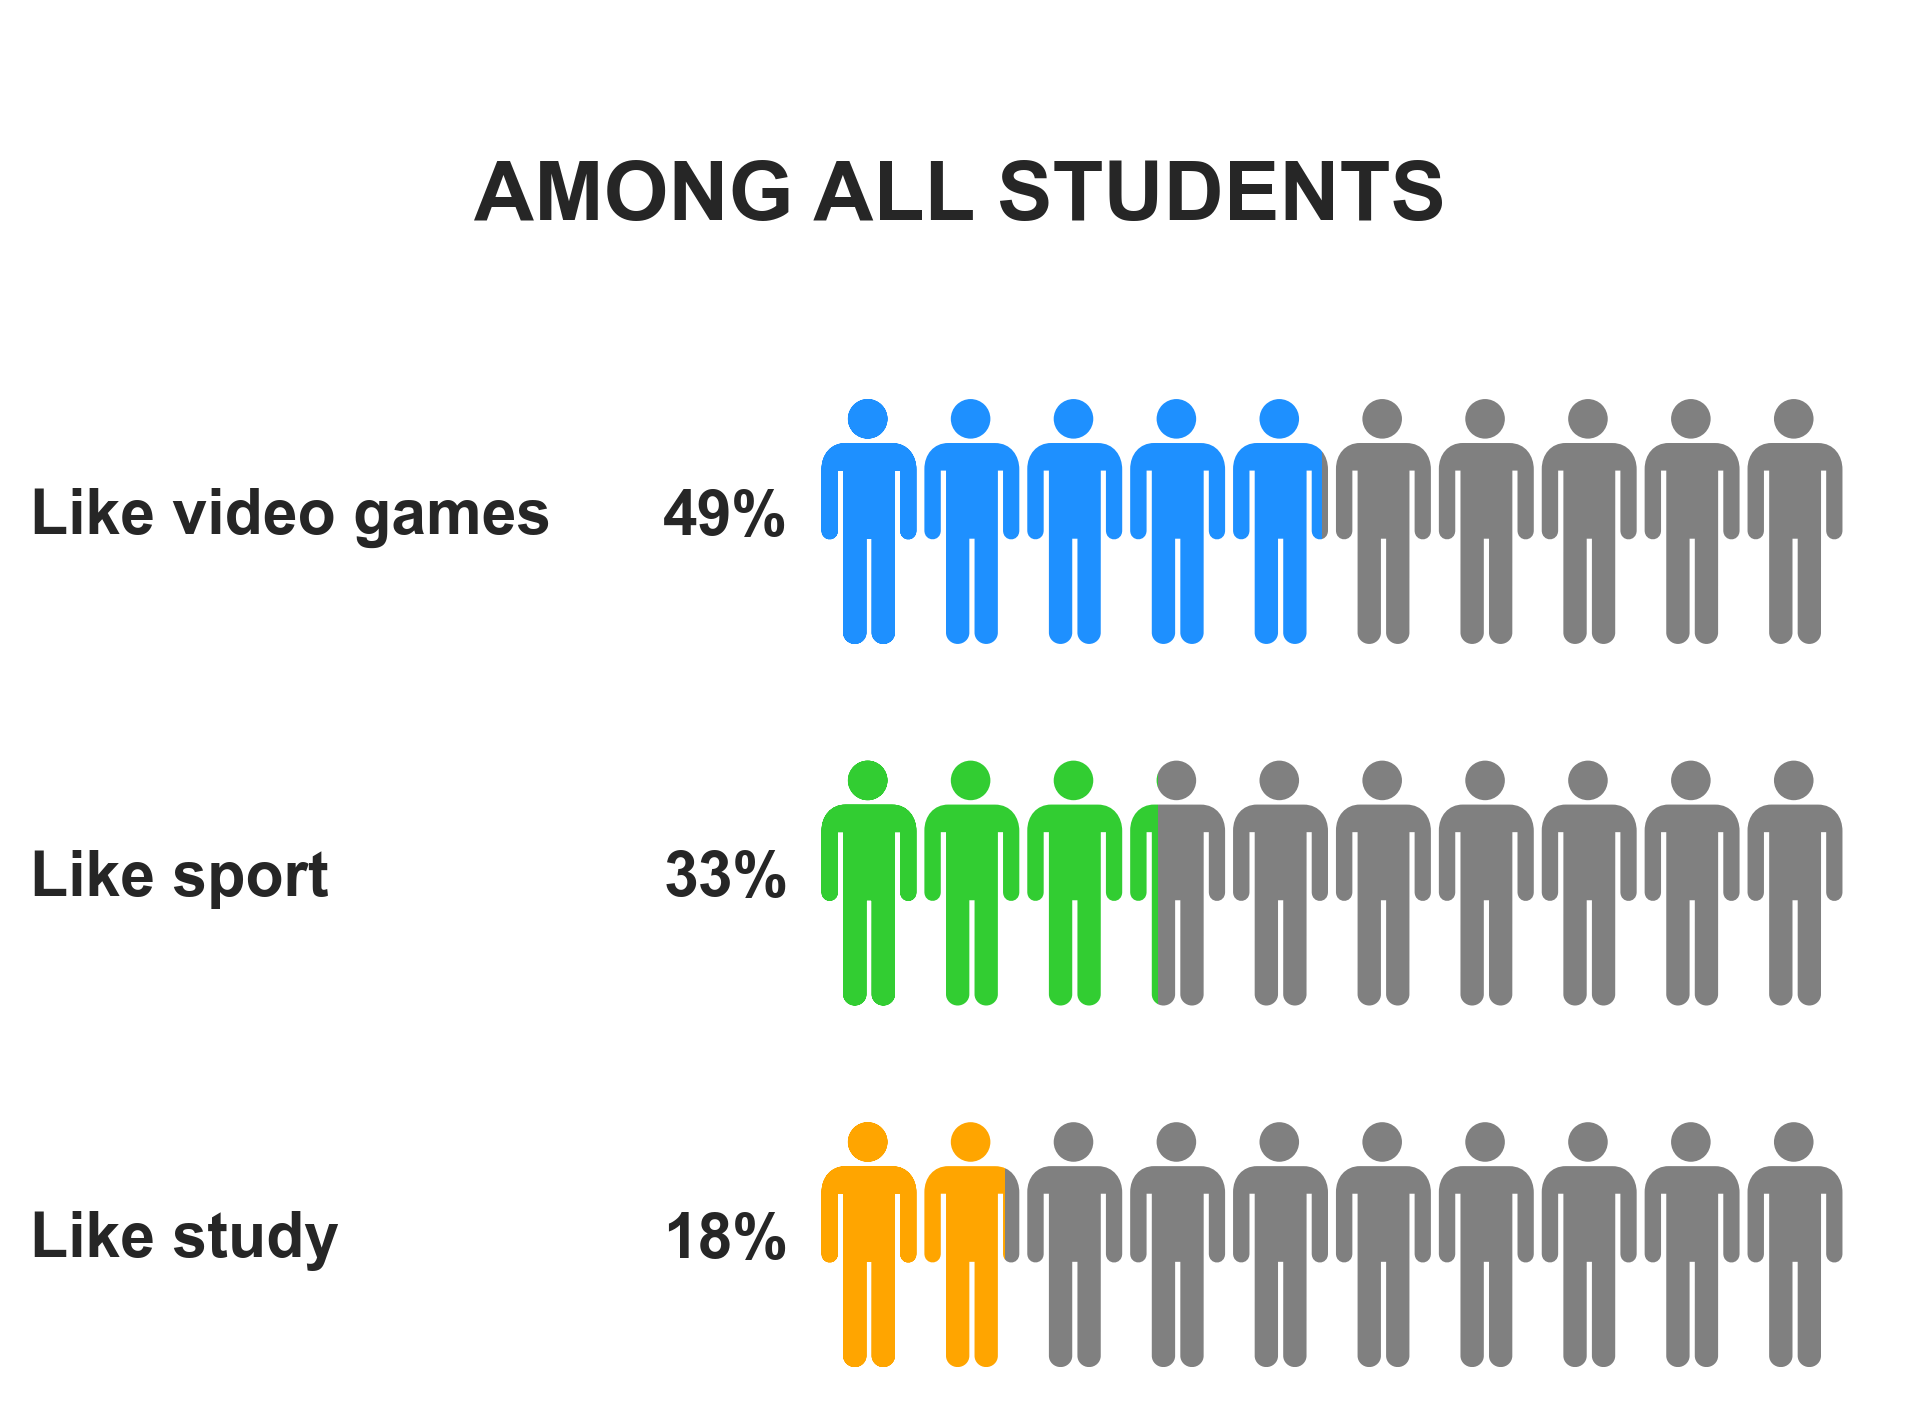

In [4]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import colors
import numpy as np


# 小人图形数据
v = np.array([[27.31,  14.17], [27.31,   6.37], [33.92,   0.],
              [42.04,   0.], [50.2,   0.], [56.81,   6.33],
              [56.81,  14.17], [56.81, 132.99], [63.39, 132.99],
              [63.35,  14.17], [63.35,   6.37], [69.96,   0.],
              [78.09,   0.], [86.21,   0.], [92.82,   6.33],
              [92.82,  14.17], [92.89, 219.03], [99.37, 219.03],
              [99.37, 143.52], [99.37, 128.35], [120., 128.35],
              [119.94, 143.52], [119.94, 220.63], [119.94, 237.41],
              [109.68, 253.84], [89.24, 253.84], [30.27, 253.9],
              [11.64, 253.9], [0., 239.32], [0., 221.1],
              [0., 143.52], [0., 128.44], [20.73, 128.44],
              [20.73, 143.52], [20.73, 219.03], [27.34, 219.03],
              [27.31,  14.17], [0., 310.], [58.39, 309.41],
              [65.0200775, 309.41], [71.37949677, 306.77584229], [
                  76.06766953, 302.08766953],
              [80.75584229, 297.39949677], [
                  83.39, 291.0400775], [83.39, 284.41],
              [83.39, 277.7799225], [80.75584229, 271.42050323], [
                  76.06766953, 266.73233047],
              [71.37949677, 262.04415771], [
                  65.0200775, 259.41], [58.39, 259.41],
              [51.7599225, 259.41], [45.40050323, 262.04415771], [
                  40.71233047, 266.73233047],
              [36.02415771, 271.42050323], [
                  33.39, 277.7799225], [33.39, 284.41],
              [33.39, 291.0400775], [36.02415771, 297.39949677], [
                  40.71233047, 302.08766953],
              [45.40050323, 306.77584229], [
                  51.7599225, 309.41], [58.39, 309.41],
              [58.39, 309.41]])

c = np.array([1, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4,
             2, 4, 4, 4, 2, 2, 2, 79, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 79])

v_horizontal = v.copy()
c_horizontal = c.copy()
for i in range(10):
    v_c = v.copy()
    v_c[:, 0] += i * (v[:, 0].max() + 10)
    v_horizontal = np.append(v_horizontal, v_c, axis=0)
    c_horizontal = np.append(c_horizontal, c.copy(), axis=0)


# 构造小人图形
path = Path(v_horizontal, c_horizontal)

# 百分比
pct = [49, 33, 18]

# 注释文字
text_list = ['AMONG ALL STUDENTS',
             'Like video games', 'Like sport', 'Like study']

# 填充颜色
cmap_list = [colors.LinearSegmentedColormap.from_list('gray_to_dodgerblue', ['gray', 'dodgerblue']),
             colors.LinearSegmentedColormap.from_list('gray_to_limegreen', ['gray', 'limegreen']),
             colors.LinearSegmentedColormap.from_list('gray_to_orange', ['gray', 'orange'])]


def arr_img_clip(ax, pct, path, cmap, x=0, y=0):
    v = path.vertices
    v[:, 0] += x
    v[:, 1] += y
    path = Path(v, path.codes)

    xmax, xmin = path.vertices[:, 0].max(), path.vertices[:, 0].min()
    ymax, ymin = path.vertices[:, 1].max(), path.vertices[:, 1].min()
    grad = np.zeros((100, 100))
    grad[:, :int(pct)] = 1
    img = ax.imshow(grad, extent=[xmin, xmax, ymin, ymax],
                    interpolation='nearest', aspect='auto', cmap=cmap)

    patch = patches.PathPatch(path, facecolor='none', edgecolor='none')
    ax.add_patch(patch)
    img.set_clip_path(patch)
    return x + (xmax - xmin) * pct / 100


fig, axs = plt.subplots(4, 1, figsize=(8, 6), dpi=300, facecolor='white')

for i, ax in enumerate(axs):
    if i == 0:
        ax.text(0.5, 0.5, text_list[i], transform=ax.transAxes, fontsize=20, fontweight='bold',
                ha='center', va='top')
    else:
        arr_img_clip(ax=ax, pct=pct[i-1], path=path, cmap=cmap_list[i-1])
        axs[i].text(-1000, 160, text_list[i], ha='left', va='center', fontsize=15, fontweight='bold',
                    bbox=dict(pad=0, facecolor='white', edgecolor='none'))
        axs[i].text(-200, 160, f'{pct[i-1]}%', ha='left', va='center', fontsize=15, fontweight='bold',
                    bbox=dict(pad=0, facecolor='white', edgecolor='none'))
    ax.set_xlim(-1000, 1350)
    ax.set_ylim(-10, 320)
    ax.set_aspect(1)
    ax.set_axis_off()

plt.show()

In [5]:
import matplotlib
print(matplotlib.matplotlib_fname())


/Users/wowblk/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc
